<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/MINST-Digits-Classification/blob/main/MINST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import math

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)


In [ ]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_ohe = ohe.transform(y_test.reshape(-1,1)).toarray()

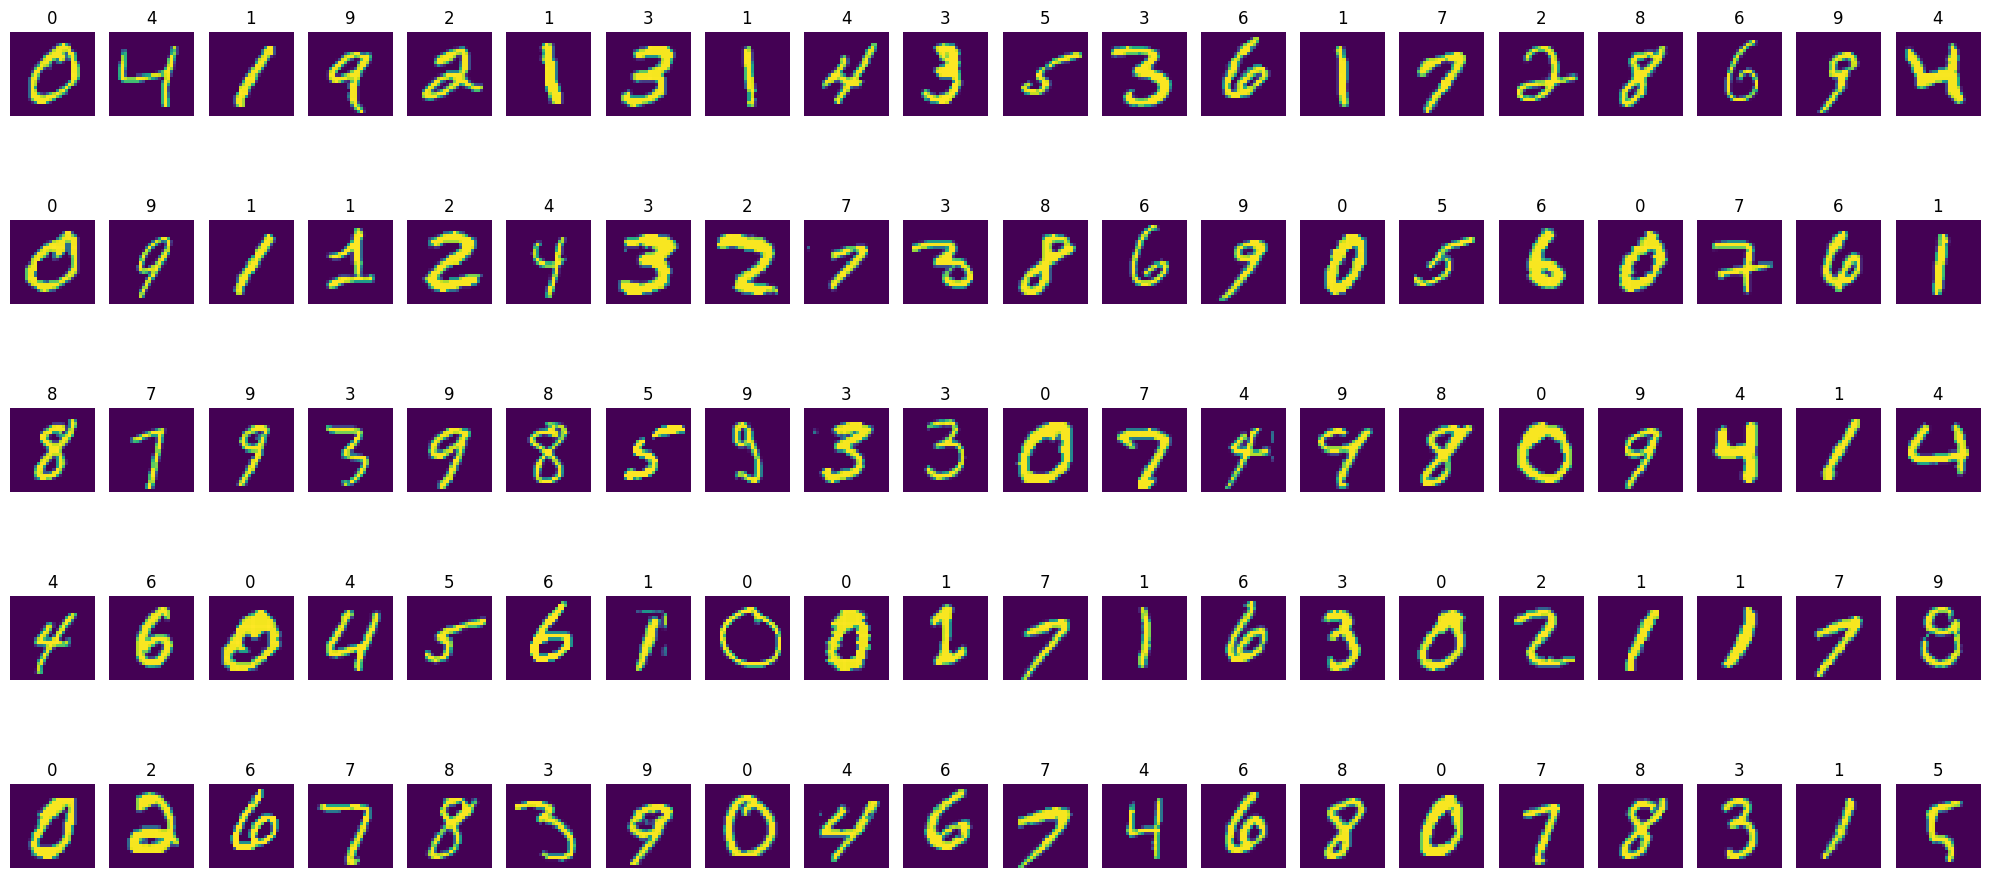

In [ ]:
plt.figure(figsize=(20,10))

for i in range(1,101):
  plt.subplot(5,20,i)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
model = Sequential([
    Input(shape=(x_train.shape[1], x_train.shape[2])),
    Flatten(),
    Dense(64, activation='relu', name='L1'),
    Dense(16, activation='relu', name='L2'),
    Dense(10, activation='softmax', name='L3')
], name='my_model')

In [ ]:
model.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(learning_rate=0.001)
)

In [ ]:
model.fit(x_train, y_train_ohe, epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 4.1595
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.9473
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6756
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4194
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2679
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2183
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1788
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1491
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1369
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1203
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1094
Epoch 12/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1019
Epoch 13/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0958
Epoch 14/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0888
Epoch 15/100
18

In [ ]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7
[8.2542031e-04 5.4670154e-04 7.3566730e-04 4.9102941e-04 1.3130688e-04
 8.0734247e-04 5.9246458e-06 9.9291331e-01 1.2648860e-03 2.2784751e-03]


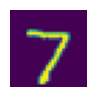

In [ ]:
print(np.argmax(y_pred[0]))
print(y_pred[0])
plt.figure(figsize=(1,1))
plt.imshow(x_test[0])
plt.axis('off')
plt.show()

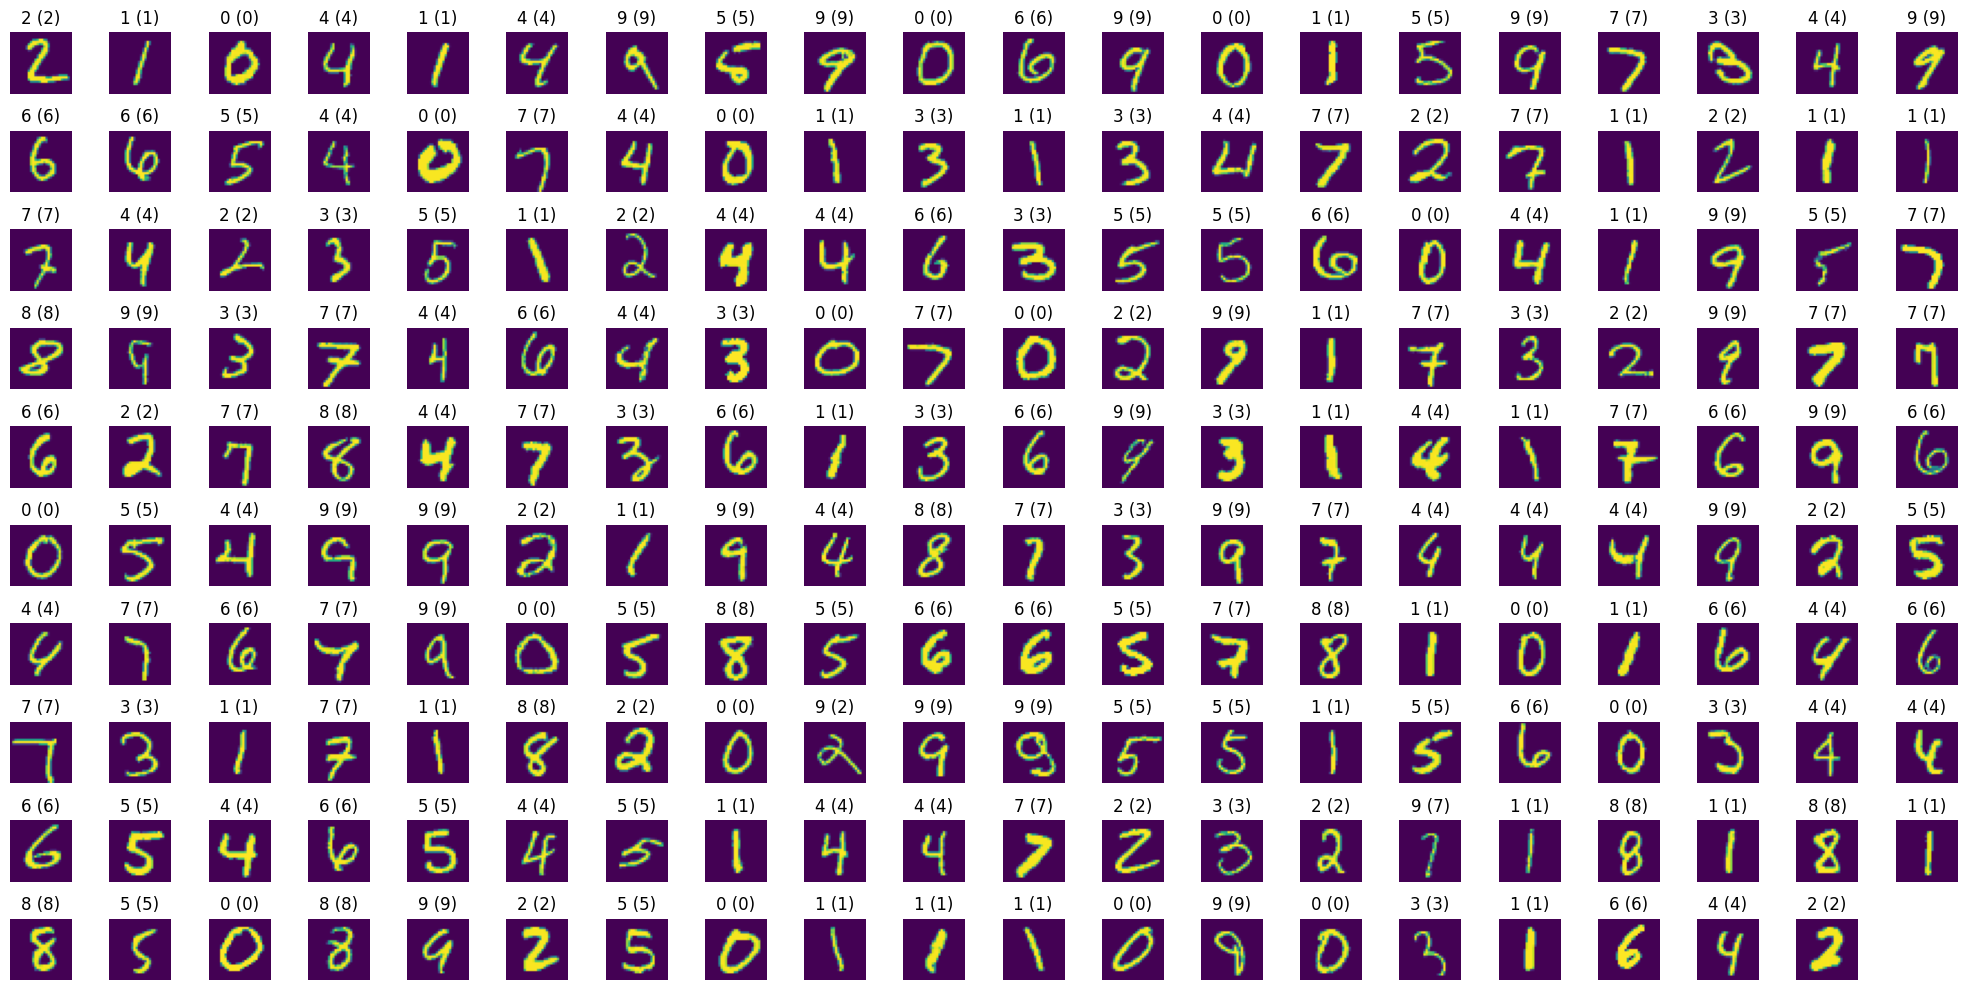

In [ ]:
plt.figure(figsize=(20,10))

for i in range(1, 200):
  plt.subplot(10,20,i)
  plt.imshow(x_test[i])
  plt.title(f'{np.argmax(y_pred[i])} ({y_test[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
misclassified_x = []
misclassified_y = []
actual_y = []

for i in range(1, len(x_test)):
  if(np.argmax(y_pred[i]) != y_test[i]):
    misclassified_x.append(x_test[i])
    misclassified_y.append(np.argmax(y_pred[i]))
    actual_y.append(y_test[i])

print(len(misclassified_x))

plt.figure(figsize=(20,20))

for i in range(0,len(misclassified_x)):
  plt.subplot(math.ceil(len(misclassified_x) / 10) ,10,i+1)
  plt.imshow(misclassified_x[i])
  plt.title(f'{misclassified_y[i]} ({actual_y[i]})')
  plt.axis('off')

plt.tight_layout()
plt.show()

345


In [ ]:
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.9655